## Problem Statement
The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_data=pd.read_csv(r'C:\Users\saurabh\Desktop\Coursera Python\Kaggle\GIT HUB\Titanic Dataset\titanic\train.csv')
test_data=pd.read_csv(r'C:\Users\saurabh\Desktop\Coursera Python\Kaggle\GIT HUB\Titanic Dataset\titanic\test.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Descriptive Analysis

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
train_data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

# Visualizing Data to Gain Insights

## Analysing Categorical Data

In [10]:
categorical_features=[features for features in train_data.columns if train_data[features].dtype == 'O']

In [11]:
numerical_features=[features for features in train_data.columns if train_data[features].dtype != 'O']

<Figure size 432x288 with 0 Axes>

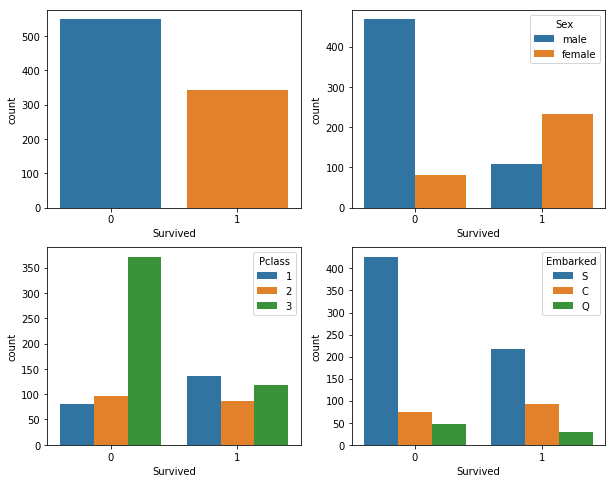

In [12]:
plt.subplots_adjust(left=14,right=15) 
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.countplot(train_data['Survived'])
plt.subplot(2,2,2)
sns.countplot(train_data['Survived'],hue=train_data['Sex'])
plt.subplot(2,2,3)
sns.countplot(train_data['Survived'],hue=train_data['Pclass'])
plt.subplot(2,2,4)
sns.countplot(train_data['Survived'],hue=train_data['Embarked'])

<Figure size 432x288 with 0 Axes>

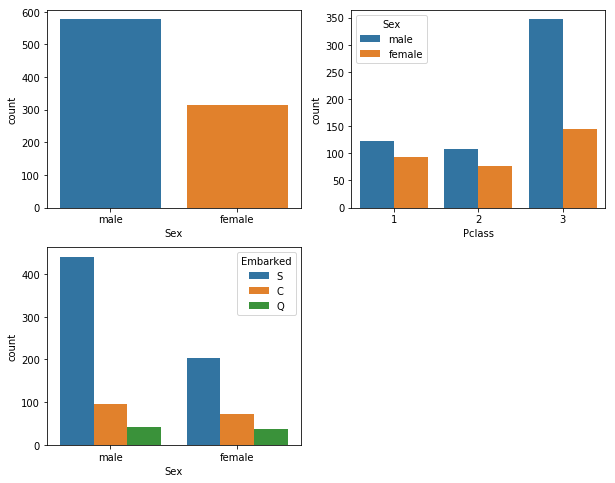

In [13]:
plt.subplots_adjust(left=24,right=25) 
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.countplot(train_data['Sex'])
plt.subplot(2,2,2)
sns.countplot(train_data['Pclass'],hue=train_data['Sex'])
plt.subplot(2,2,3)
sns.countplot(train_data['Sex'],hue=train_data['Embarked'])

## Analysing Quantitative Data

<Figure size 432x288 with 0 Axes>

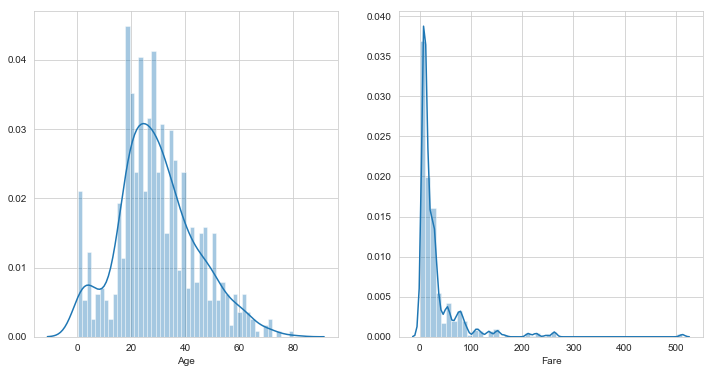

In [14]:
plt.subplots_adjust(left=14,right=15)
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(train_data['Age'].dropna(),bins=50)
plt.subplot(1,2,2)
sns.distplot(train_data['Fare'].dropna(),bins=50)

## Boxplots between categorical and Qualitative

<Figure size 432x288 with 0 Axes>

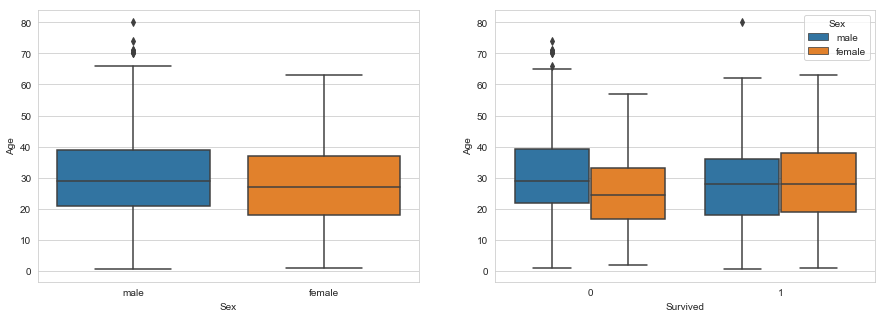

In [15]:
plt.subplots_adjust(left=13,right=15) 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(train_data['Sex'],train_data['Age'])
plt.subplot(1,2,2)
sns.boxplot(train_data['Survived'],train_data['Age'],hue=train_data['Sex'])

<Figure size 432x288 with 0 Axes>

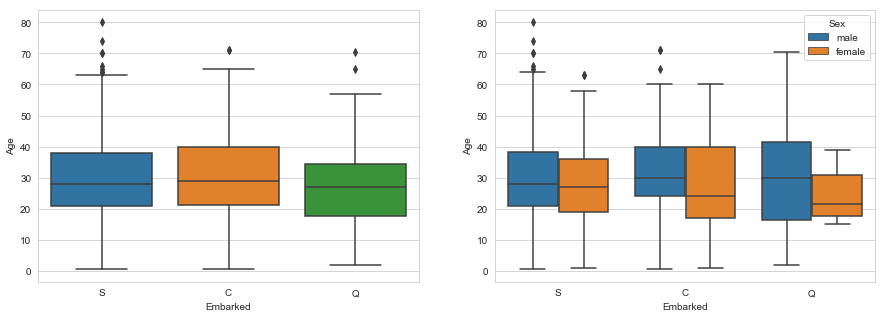

In [16]:
plt.subplots_adjust(left=13,right=15) 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(train_data['Embarked'],train_data['Age'])
plt.subplot(1,2,2)
sns.boxplot(train_data['Embarked'],train_data['Age'],hue=train_data['Sex'])

<Figure size 432x288 with 0 Axes>

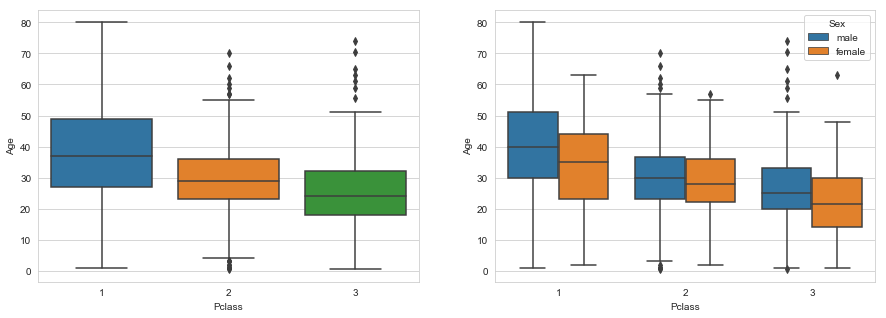

In [17]:
plt.subplots_adjust(left=13,right=15) 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(train_data['Pclass'],train_data['Age'])
plt.subplot(1,2,2)
sns.boxplot(train_data['Pclass'],train_data['Age'],hue=train_data['Sex'])

<Figure size 432x288 with 0 Axes>

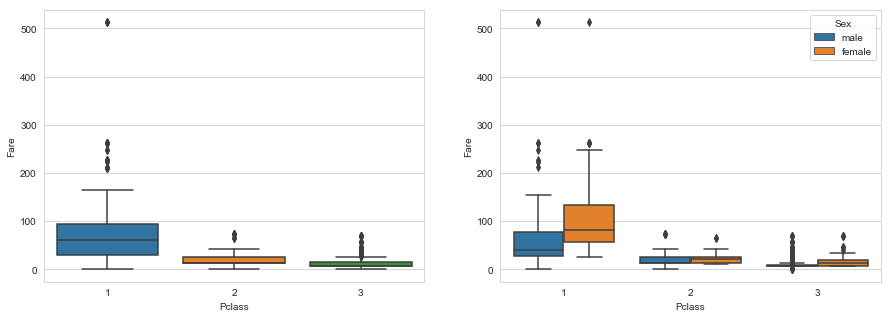

In [18]:
plt.subplots_adjust(left=13,right=15) 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(train_data['Pclass'],train_data['Fare'])
plt.subplot(1,2,2)
sns.boxplot(train_data['Pclass'],train_data['Fare'],hue=train_data['Sex'])

<Figure size 432x288 with 0 Axes>

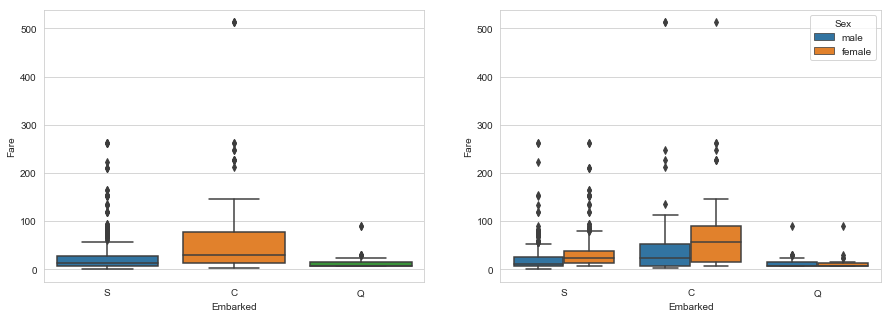

In [19]:
plt.subplots_adjust(left=13,right=15) 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(train_data['Embarked'],train_data['Fare'])
plt.subplot(1,2,2)
sns.boxplot(train_data['Embarked'],train_data['Fare'],hue=train_data['Sex'])

# Data Preprocessing

## Handling Missing Values

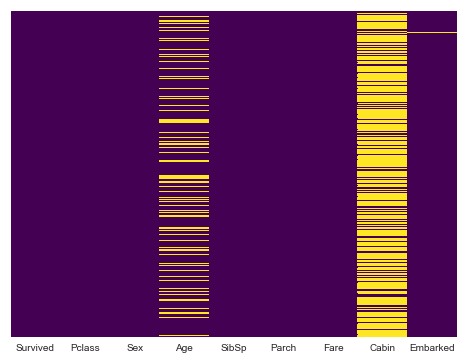

In [20]:
# Plot to see the missing values in the train data
plt.figure(figsize=(8,6))
sns.heatmap(train_data.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [21]:
# Percentage of missing values 
features_witn_na_values = [features for features in train_data.columns if train_data[features].isnull().sum()>1]
for features in features_witn_na_values:
    print(features, np.round(train_data[features].isnull().mean(),4), '% of missing values')

Age 0.1987 % of missing values
Cabin 0.771 % of missing values
Embarked 0.0022 % of missing values


In [22]:
# As more than 75% of values of Cabin feature is missing therefore it can be dropped
train_data.drop('Cabin',inplace=True,axis=1)

In [23]:
# Filling missing value
def input_age(cols):
    Pclass=cols[0]
    Age=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else :
            return 24
    else:
        return Age
train_data['Age']=train_data[['Pclass','Age']].apply(input_age,axis=1)

In [24]:
train_data.dropna(inplace=True)

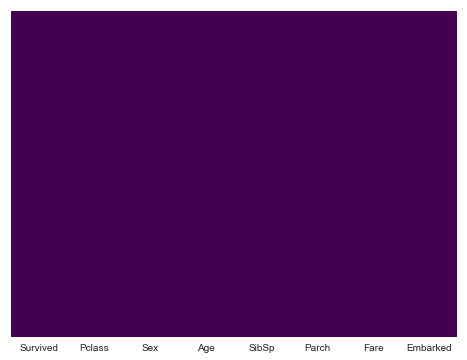

In [25]:
# Plot to see the missing values in the train data after all missing values
plt.figure(figsize=(8,6))
sns.heatmap(train_data.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [26]:
train_data['Fare'][0]

7.25

In [27]:
# log normalization to reduce skewness
train_data["Fare"] = train_data["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()
train_data['Sex']=le.fit_transform(train_data['Sex'])
train_data['Embarked']=le.fit_transform(train_data['Embarked'])

# Calculation of Accuracy Score with different Classifier

In [30]:
X=train_data.drop('Survived',axis=1)
y=train_data['Survived']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)
print("X_train shape: "+str(X_train.shape))
print("X_test shape: "+str(y_test.shape))
print("y_train shape: "+str(y_train.shape))
print("y_test shape: "+str(y_test.shape))

X_train shape: (666, 7)
X_test shape: (223,)
y_train shape: (666,)
y_test shape: (223,)


In [33]:
logreg=LogisticRegression()
param_grid={'C':[0.001,0.01,0.1,1,10,100]}
grid_logreg=GridSearchCV(logreg,param_grid,cv=10,scoring='accuracy')
grid_logreg.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [34]:
print('best parameter that can be used for this classifier is : '+ str(grid_logreg.best_params_))
print('best score of that classifier is : ' + str(grid_logreg.best_score_))

best parameter that can be used for this classifier is : {'C': 0.1}
best score of that classifier is : 0.796400449943757


In [35]:
dt=DecisionTreeClassifier()
param_grid=dict(max_depth=range(1,11))
grid_dt=GridSearchCV(dt,param_grid,cv=10,scoring='accuracy')
grid_dt.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 11)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [36]:
print('best parameter that can be used for this classifier is : '+ str(grid_dt.best_params_))
print('best score of that classifier is : ' + str(grid_dt.best_score_))

best parameter that can be used for this classifier is : {'max_depth': 7}
best score of that classifier is : 0.8211473565804275


In [37]:
knn=KNeighborsClassifier()
param_grid=dict(n_neighbors=range(1,31))
grid_knn=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
grid_knn.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 31)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [38]:
print('best parameter that can be used for this classifier is : '+ str(grid_knn.best_params_))
print('best score of that classifier is : ' + str(grid_knn.best_score_))

best parameter that can be used for this classifier is : {'n_neighbors': 7}
best score of that classifier is : 0.7862767154105736


In [39]:
rf=RandomForestClassifier()
param_grid=dict(n_estimators=range(1,16),max_depth=range(1,10))
grid_rf=GridSearchCV(rf,param_grid,cv=10,scoring='accuracy')
grid_rf.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(1, 16), 'max_depth': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [40]:
print('best parameter that can be used for this classifier is : '+ str(grid_rf.best_params_))
print('best score of that classifier is : ' + str(grid_rf.best_score_))

best parameter that can be used for this classifier is : {'max_depth': 7, 'n_estimators': 6}
best score of that classifier is : 0.8346456692913385


In [41]:
svm=SVC()
param_grid={'C':[0.01,0.1,1,10,100,1000],'gamma':[10,1,0.1,0.01,0.001]}
grid_svm=GridSearchCV(svm,param_grid,cv=10,scoring='accuracy')
grid_svm.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [10, 1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [42]:
print('best parameter that can be used for this classifier is : '+ str(grid_svm.best_params_))
print('best score of that classifier is : ' + str(grid_svm.best_score_))

best parameter that can be used for this classifier is : {'C': 10, 'gamma': 0.01}
best score of that classifier is : 0.8222722159730034
